In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# we only need 20 percent of x_train data, and the test data is used for validation
# as my computer was doing it really fast, I took the complete training data
(x_training, y_training), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
print(x_training.shape)
print(y_training.shape)
print(x_test.shape)
print(y_test.shape)


# 32*32 means pixel and 3 means RGB values

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Split the training set into new training set which is 20%
# x_val_to_be, x_train, y_val_to_be, y_train = train_test_split(x_training, y_training, test_size=0.2, random_state=20)
# x_val_to_be, x_val, y_val_to_be, y_val = train_test_split(x_val_to_be, y_val_to_be, test_size=0.05, random_state=20)


# y_train = to_categorical(y_train, 10)
# y_val = to_categorical(y_val, 10)
# y_test = to_categorical(y_test, 10)

In [ ]:
# (x_training, y_training), (x_test, y_test) = cifar10.load_data()

# x_val_to_be, x_train, y_val_to_be, y_train = train_test_split(x_training, y_training, test_size=0.2,random_state=20)
# x_val_to_be, x_val, y_val_to_be, y_val = train_test_split(x_val_to_be, y_val_to_be, test_size=0.05,random_state=20)
# y_train = to_categorical(y_train, 10)
# y_val = to_categorical(y_val, 10)
# y_test = to_categorical(y_test, 10)

In [6]:
# taking 20 percercent of training as validation data
x_train,x_val, y_train, y_val = train_test_split(x_training, y_training, test_size=0.2,random_state=65)

# One hot encoding for the output
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [7]:
print("X training size ",x_train.shape)
print("Y training size ",y_train.shape)
print("Y validation size ",x_val.shape)
print("X validation size ",y_val.shape)
print("X testing size ",x_test.shape)
print("Y testing size ",y_test.shape)





X training size  (40000, 32, 32, 3)
Y training size  (40000, 10)
Y validation size  (10000, 32, 32, 3)
X validation size  (10000, 10)
X testing size  (10000, 32, 32, 3)
Y testing size  (10000, 10)


In [8]:
# noralizing the input images which are each of 32*32 pixels with 3 rgb values for each pixel

def normalized(x_train,x_val, x_test):
  scaler = MinMaxScaler()

  # x_train.reshape(x_train.shape[0], -1) converts the image data into 1d array for each image so we get 10000*3072 2d array 
  x_train_normalized = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1)).reshape(x_train.shape)
  x_val_normalized = scaler.transform(x_val.reshape(x_val.shape[0], -1)).reshape(x_val.shape)
  x_test_normalized = scaler.transform(x_test.reshape(x_test.shape[0], -1)).reshape(x_test.shape)

  return x_train_normalized, x_val_normalized, x_test_normalized







In [9]:
# Mlp model defined

def mlp():
    mlp_network = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
    ])

    mlp_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return mlp_network


In [10]:
# cnn1 model defined

def cnn1():
    cnn1_network = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
    ])

    cnn1_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn1_network
    

In [11]:
# cnn2 model defined

def cnn2():
    cnn2_network = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

    cnn2_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn2_network


In [12]:
x_train_normalized, x_val_normalized, x_test_normalized = normalized(x_train,x_val, x_test)

mlp_model = mlp()
cnn1_model = cnn1()
cnn2_model = cnn2()


# training all the three models
history_mlp = mlp_model.fit(x_train_normalized, y_train, epochs=5, batch_size=32, validation_data=(x_val_normalized, y_val))
history_cnn1 = cnn1_model.fit(x_train_normalized, y_train, epochs=5, batch_size=32,validation_data=(x_val_normalized, y_val))
history_cnn2 = cnn2_model.fit(x_train_normalized, y_train, epochs=5, batch_size=32, validation_data=(x_val_normalized, y_val))









Epoch 1/5
1250/1250 [==============================] - 10s 4ms/step - loss: 1.9216 - accuracy: 0.2981 - val_loss: 1.8468 - val_accuracy: 0.3367
Epoch 2/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7789 - accuracy: 0.3556 - val_loss: 1.7525 - val_accuracy: 0.3581
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7288 - accuracy: 0.3735 - val_loss: 1.7183 - val_accuracy: 0.3799
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6956 - accuracy: 0.3886 - val_loss: 1.6505 - val_accuracy: 0.4084
Epoch 5/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6623 - accuracy: 0.4003 - val_loss: 1.6549 - val_accuracy: 0.4041
Epoch 1/5
1250/1250 [==============================] - 21s 11ms/step - loss: 1.4128 - accuracy: 0.4868 - val_loss: 1.1426 - val_accuracy: 0.5885
Epoch 2/5
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9562 - accuracy: 0.6603 - val_loss: 0.9959 - val_accuracy: 0

In [13]:
for key in history_mlp.history:
    print("MLP ",key, history_mlp.history[key][-1])
print("")

for key in history_cnn1.history:
    print("CNN1 ",key, history_cnn1.history[key][-1])
print("")

for key in history_cnn2.history:
    print("CNN2 ",key, history_cnn2.history[key][-1])
print("")

MLP  loss 1.6623445749282837
MLP  accuracy 0.40027499198913574
MLP  val_loss 1.6549222469329834
MLP  val_accuracy 0.4041000008583069

CNN1  loss 0.10671775788068771
CNN1  accuracy 0.9656000137329102
CNN1  val_loss 1.5448698997497559
CNN1  val_accuracy 0.6342999935150146

CNN2  loss 0.779208779335022
CNN2  accuracy 0.7257500290870667
CNN2  val_loss 0.9199735522270203
CNN2  val_accuracy 0.6850000023841858



In [14]:
# evaluating all three models on test data
mlp_eval = mlp_model.evaluate(x_test_normalized,y_test)
cnn1_eval = cnn1_model.evaluate(x_test_normalized,y_test)
cnn2_eval = cnn2_model.evaluate(x_test_normalized,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9115 - accuracy: 0.6835


In [18]:
print("MLP testing accuracy ", mlp_eval[1])
print("CNN1 testing accuracy ", cnn1_eval[1])
print("CNN2 testing accuracy ", cnn2_eval[1])


MLP testing accuracy  0.4059000015258789
CNN1 testing accuracy  0.6233999729156494
CNN2 testing accuracy  0.6834999918937683


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 1.0, 'Validation accuracy')

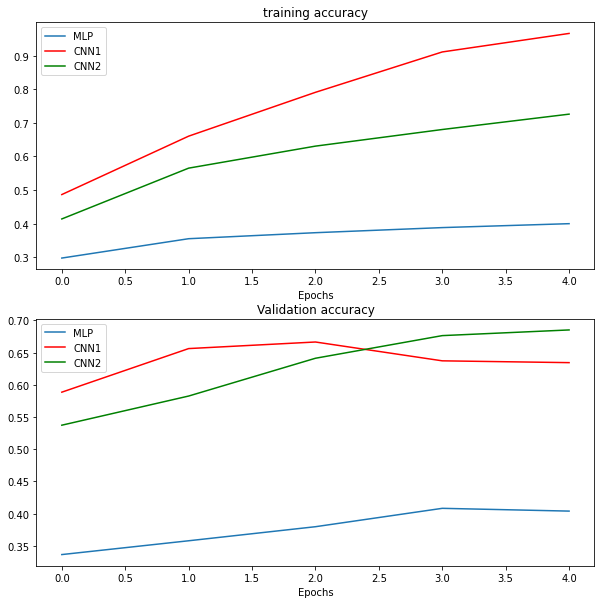

In [20]:
print(history_mlp.history.keys())

fig, axs = plt.subplots(2, figsize=(10, 10))

axs[0].plot(history_mlp.history['accuracy'],label = "MLP")
axs[0].plot(history_cnn1.history['accuracy'], 'r', label = "CNN1")
axs[0].plot(history_cnn2.history['accuracy'], 'g', label = "CNN2")
axs[0].legend(['MLP', 'CNN1', 'CNN2'])
axs[0].set_xlabel('Epochs')
axs[0].set_title('training accuracy')

axs[1].plot(history_mlp.history['val_accuracy'],label = "MLP")
axs[1].plot(history_cnn1.history['val_accuracy'], 'r', label = "CNN1")
axs[1].plot(history_cnn2.history['val_accuracy'], 'g', label = "CNN2")
axs[1].legend(['MLP', 'CNN1', 'CNN2'])
axs[1].set_xlabel('Epochs')
axs[1].set_title('Validation accuracy')


Text(0.5, 1.0, 'Validation accuracy')

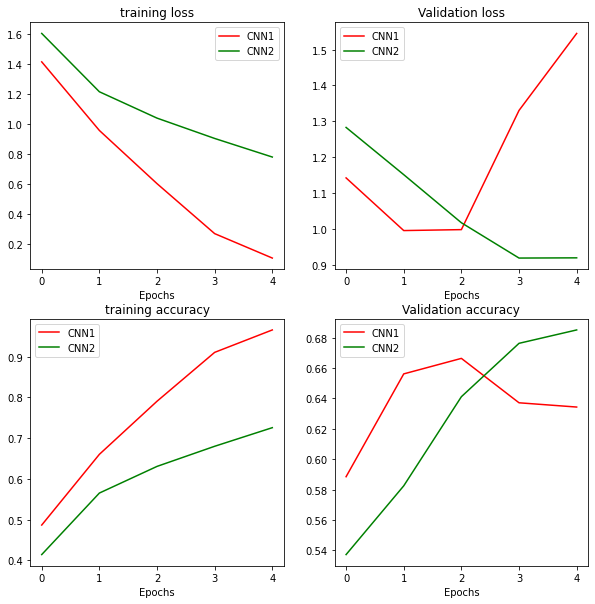

In [21]:
history_mlp.history.keys()

fig, axs = plt.subplots(2,2, figsize=(10, 10))

# axs[0,0].plot(history_mlp.history['loss'],label = "MLP")
axs[0,0].plot(history_cnn1.history['loss'], 'r', label = "CNN1")
axs[0,0].plot(history_cnn2.history['loss'], 'g', label = "CNN2")
# axs[0,0].legend(['MLP', 'CNN1', 'CNN2'])
axs[0,0].legend(['CNN1', 'CNN2'])
axs[0,0].set_xlabel('Epochs')
axs[0,0].set_title('training loss')

# axs[0,1].plot(history_mlp.history['val_loss'],label = "MLP")
axs[0,1].plot(history_cnn1.history['val_loss'], 'r', label = "CNN1")
axs[0,1].plot(history_cnn2.history['val_loss'], 'g', label = "CNN2")
# axs[0,1].legend(['MLP', 'CNN1', 'CNN2'])
axs[0,1].legend([ 'CNN1', 'CNN2'])
axs[0,1].set_xlabel('Epochs')
axs[0,1].set_title('Validation loss')

# axs[1,0].plot(history_mlp.history['accuracy'],label = "MLP")
axs[1,0].plot(history_cnn1.history['accuracy'], 'r', label = "CNN1")
axs[1,0].plot(history_cnn2.history['accuracy'], 'g', label = "CNN2")
# axs[1,0].legend(['MLP', 'CNN1', 'CNN2'])
axs[1,0].legend(['CNN1', 'CNN2'])
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_title('training accuracy')

# axs[1,1].plot(history_mlp.history['val_accuracy'],label = "MLP")
axs[1,1].plot(history_cnn1.history['val_accuracy'], 'r', label = "CNN1")
axs[1,1].plot(history_cnn2.history['val_accuracy'], 'g', label = "CNN2")
# axs[1,1].legend(['MLP', 'CNN1', 'CNN2'])
axs[1,1].legend(['CNN1', 'CNN2'])
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_title('Validation accuracy')



